In [1]:
import pandas as pd

# Load the Data Cleaning sheet
df = pd.read_excel("Siemens_Maintenance.xlsx", sheet_name="Data Cleaning")

# Preview the first few rows
print(df.head())

            Timestamp Machine ID  Temperature (°C)  Vibration (mm/s)  \
0 2025-06-01 00:00:00        M01             55.80              5.77   
1 2025-06-01 00:01:00        M01             63.29              6.08   
2 2025-06-01 00:02:00        M01             65.92              3.88   
3 2025-06-01 00:03:00        M01             65.45              4.28   
4 2025-06-01 00:04:00        M01             66.30              2.05   

   Pressure (Bar)   Status  Temperature Cleaned  Vibration Cleaned  \
0            7.38  Warning                55.80               5.77   
1            7.96  Failure                63.29               6.08   
2            9.34  Running                65.92               3.88   
3            9.18  Running                65.45               4.28   
4            8.10  Running                66.30               2.05   

   Pressure Cleaned Anomaly  Rolling Temp Avg  Risk Score Alert Level  \
0              7.38  Normal            55.800      26.265         Low   


In [2]:
# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Check for missing values
print(df.isnull().sum())

# Optional: drop rows with missing critical values
df = df.dropna(subset=['Temperature Cleaned', 'Vibration Cleaned', 'Pressure Cleaned'])

Timestamp                0
Machine ID               0
Temperature (°C)         0
Vibration (mm/s)         0
Pressure (Bar)           0
Status                   0
Temperature Cleaned      9
Vibration Cleaned      237
Pressure Cleaned         6
Anomaly                  0
Rolling Temp Avg         0
Risk Score               0
Alert Level              0
Maintenance Needed       0
dtype: int64


In [3]:
# Create binary labels
df['Failure_Label'] = df['Status'].apply(lambda x: 1 if x == 'Failure' else 0)

In [4]:
# Features we'll use
features = ['Temperature Cleaned', 'Vibration Cleaned', 'Pressure Cleaned', 'Risk Score']
X = df[features]
y = df['Failure_Label']

In [5]:
# Check class balance
print(y.value_counts())

Failure_Label
0    3687
1    1062
Name: count, dtype: int64


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [9]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
# Predict
y_pred = model.predict(X_test)

In [11]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[738   0]
 [  0 212]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       738
           1       1.00      1.00      1.00       212

    accuracy                           1.00       950
   macro avg       1.00      1.00      1.00       950
weighted avg       1.00      1.00      1.00       950



In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
importance = model.feature_importances_
feat_df = pd.DataFrame({'Feature': features, 'Importance': importance})
feat_df.sort_values('Importance', ascending=False, inplace=True)

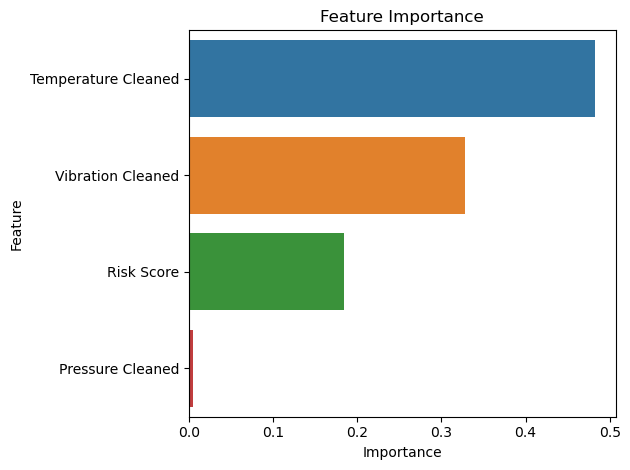

In [14]:
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title("Feature Importance")
plt.tight_layout()
plt.show()